In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score , GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


# About Dataset
Context
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

Content price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

# Read Data

In [2]:
train_data = pd.read_csv('train.csv')
test_data= pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [3]:
test_data

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
2,8,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53
3,10,0.23,Very Good,H,VS1,59.4,61.0,4.00,4.05,2.39
4,12,0.23,Ideal,J,VS1,62.8,56.0,3.93,3.90,2.46
...,...,...,...,...,...,...,...,...,...,...
10895,53922,0.70,Very Good,E,VS2,62.8,60.0,5.59,5.65,3.53
10896,53923,0.70,Very Good,D,VS1,63.1,59.0,5.67,5.58,3.55
10897,53933,0.70,Very Good,E,VS2,60.5,59.0,5.71,5.76,3.47
10898,53934,0.70,Very Good,E,VS2,61.2,59.0,5.69,5.72,3.49


In [4]:
train_data.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
5,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
6,11,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73
7,13,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33
8,14,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
9,15,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27


In [5]:
train_data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
mean,26758.804554,0.796964,61.746080,57.439542,3942.706343,5.724376,5.728122,3.534367
std,15484.904515,0.481455,1.435246,2.240196,4023.534556,1.132496,1.159641,0.714543
min,2.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13326.750000,0.380000,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000
50%,26824.500000,0.710000,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000
75%,40290.250000,1.030000,62.500000,59.000000,5309.250000,6.500000,6.500000,4.020000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
train_data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

[Text(0.5, 1.0, 'Cut counts')]

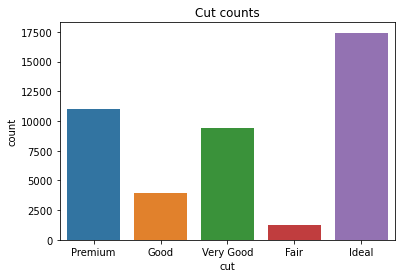

In [7]:
Cutplot=sns.countplot(x='cut',data= train_data).set(title='Cut counts')
Cutplot

[Text(0.5, 1.0, 'Colors counts')]

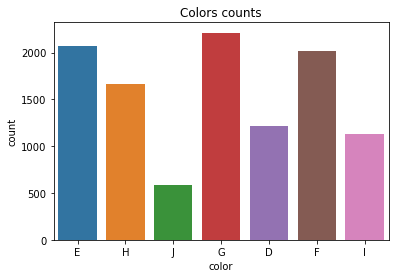

In [8]:
Colorplot=sns.countplot(x='color',data= test_data).set(title='Colors counts')
Colorplot

[Text(0.5, 1.0, 'Clarity counts')]

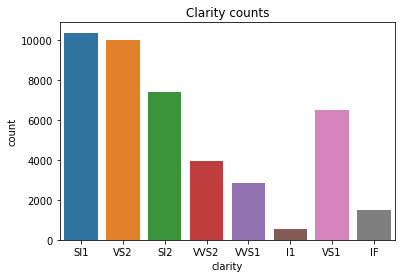

In [9]:
Clarityplot=sns.countplot(x='clarity',data= train_data).set(title='Clarity counts')
Clarityplot

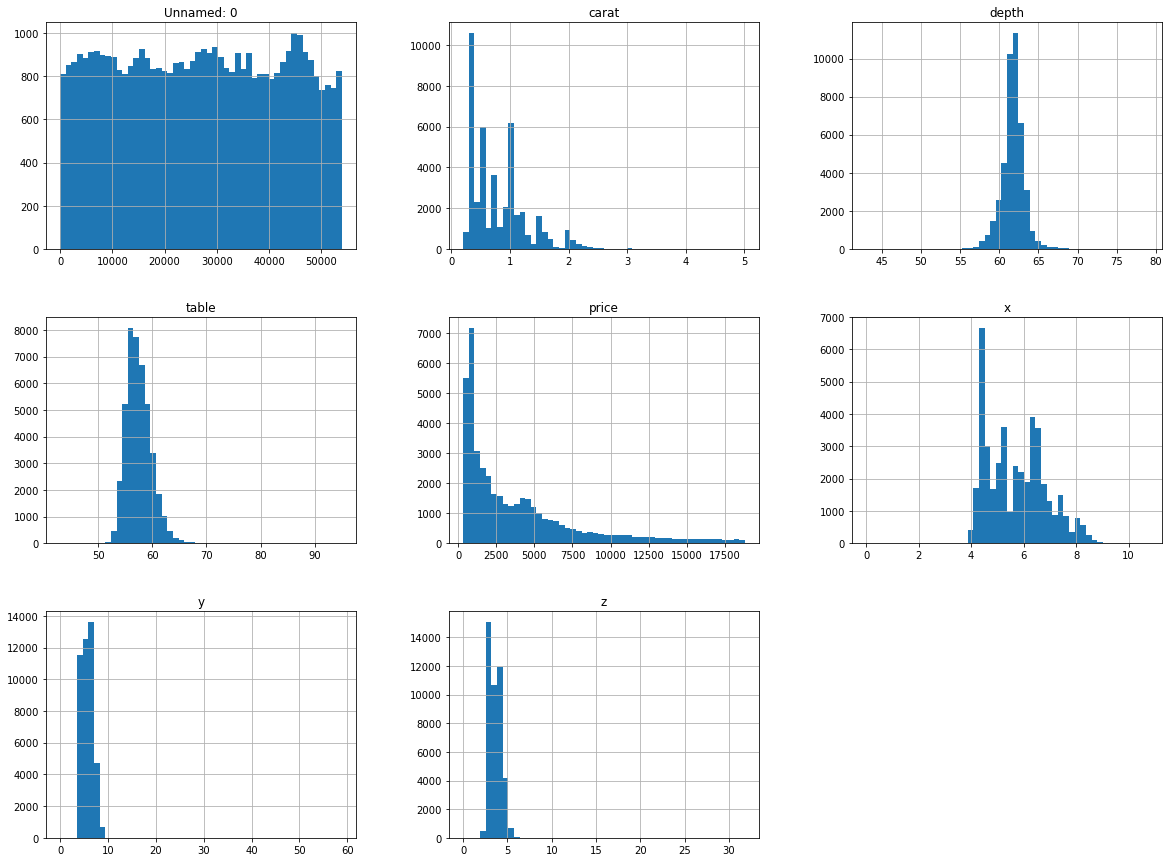

In [10]:
train_data.hist(bins=50, figsize=(20,15));

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43040 non-null  int64  
 1   carat       43040 non-null  float64
 2   cut         43040 non-null  object 
 3   color       43040 non-null  object 
 4   clarity     43040 non-null  object 
 5   depth       43040 non-null  float64
 6   table       43040 non-null  float64
 7   price       43040 non-null  int64  
 8   x           43040 non-null  float64
 9   y           43040 non-null  float64
 10  z           43040 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [12]:
corr_matrix = train_data.corr()
corr_matrix

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.374606,-0.040978,-0.116833,-0.301711,-0.407353,-0.395176,-0.400306
carat,-0.374606,1.000000,0.022599,0.191260,0.923801,0.974368,0.946001,0.948625
depth,-0.040978,0.022599,1.000000,-0.292084,-0.014393,-0.031088,-0.034945,0.088335
table,-0.116833,0.191260,-0.292084,1.000000,0.136975,0.204768,0.191469,0.159775
price,-0.301711,0.923801,-0.014393,0.136975,1.000000,0.887483,0.863748,0.860625
x,-0.407353,0.974368,-0.031088,0.204768,0.887483,1.000000,0.969541,0.966909
y,-0.395176,0.946001,-0.034945,0.191469,0.863748,0.969541,1.000000,0.944215
z,-0.400306,0.948625,0.088335,0.159775,0.860625,0.966909,0.944215,1.000000


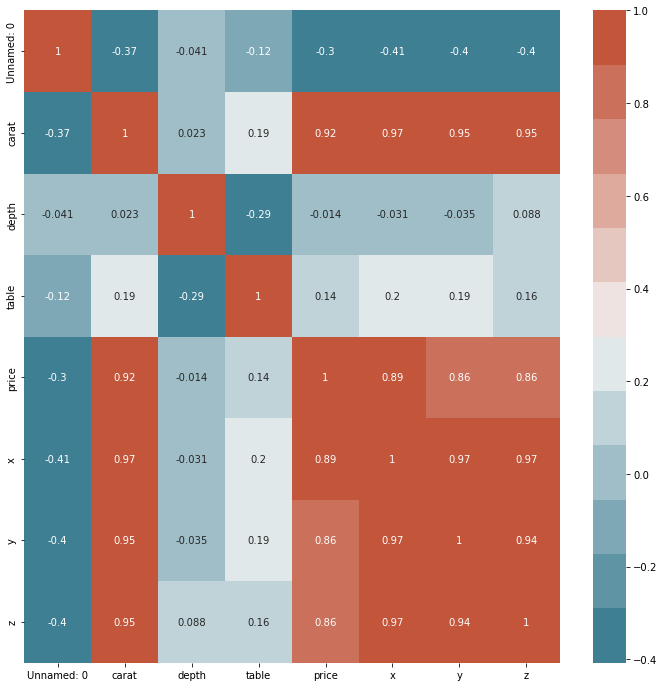

In [13]:
plt.figure(figsize=(12, 12))
df_corr = train_data.corr()
sns.heatmap(df_corr, cmap=sns.diverging_palette(220, 20, n=12), annot=True)

plt.show()

In [14]:
corr_matrix = train_data.corr()
corr_matrix["price"].sort_values(ascending=False)

price         1.000000
carat         0.923801
x             0.887483
y             0.863748
z             0.860625
table         0.136975
depth        -0.014393
Unnamed: 0   -0.301711
Name: price, dtype: float64

In [15]:
train_data = train_data.drop(['depth',],axis=1)
test_data = test_data.drop(['depth',],axis=1)

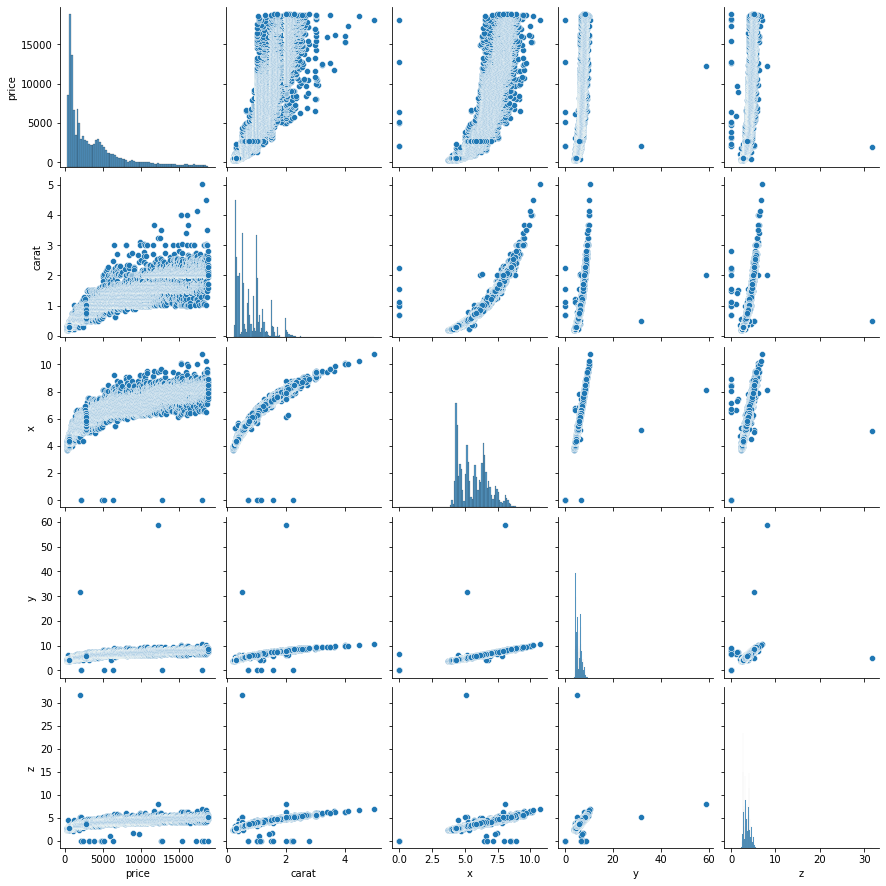

In [16]:
attributes=['price','carat','x','y','z']
sns.pairplot(train_data[attributes]);

In [17]:
# train_data.drop(train_data[train_data["price"]> 15000].index, inplace=True)

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='carat', ylabel='price'>,
        <AxesSubplot:xlabel='x', ylabel='price'>,
        <AxesSubplot:xlabel='y', ylabel='price'>,
        <AxesSubplot:xlabel='z', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='carat'>,
        <AxesSubplot:xlabel='carat', ylabel='carat'>,
        <AxesSubplot:xlabel='x', ylabel='carat'>,
        <AxesSubplot:xlabel='y', ylabel='carat'>,
        <AxesSubplot:xlabel='z', ylabel='carat'>],
       [<AxesSubplot:xlabel='price', ylabel='x'>,
        <AxesSubplot:xlabel='carat', ylabel='x'>,
        <AxesSubplot:xlabel='x', ylabel='x'>,
        <AxesSubplot:xlabel='y', ylabel='x'>,
        <AxesSubplot:xlabel='z', ylabel='x'>],
       [<AxesSubplot:xlabel='price', ylabel='y'>,
        <AxesSubplot:xlabel='carat', ylabel='y'>,
        <AxesSubplot:xlabel='x', ylabel='y'>,
        <AxesSubplot:xlabel='y', ylabel='y'>,
        <AxesSubplot:xlabel='z', ylabel='y'>],
    

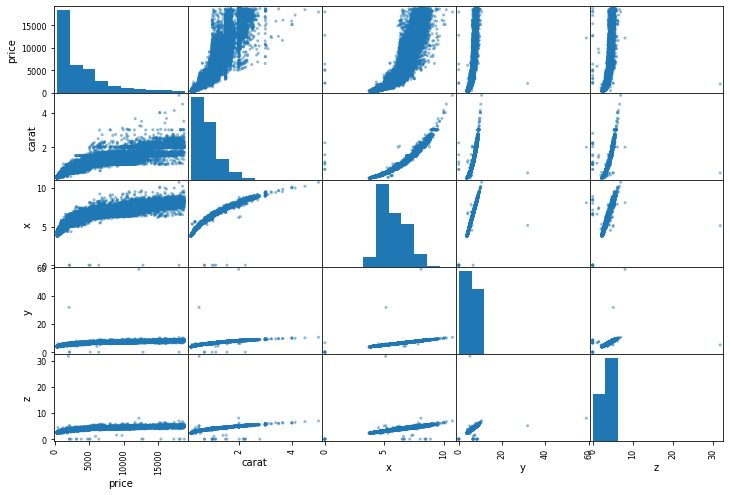

In [18]:
from pandas.plotting import scatter_matrix
attributes = ["price", "carat", "x","y","z"]
scatter_matrix(train_data[attributes], figsize=(12, 8))

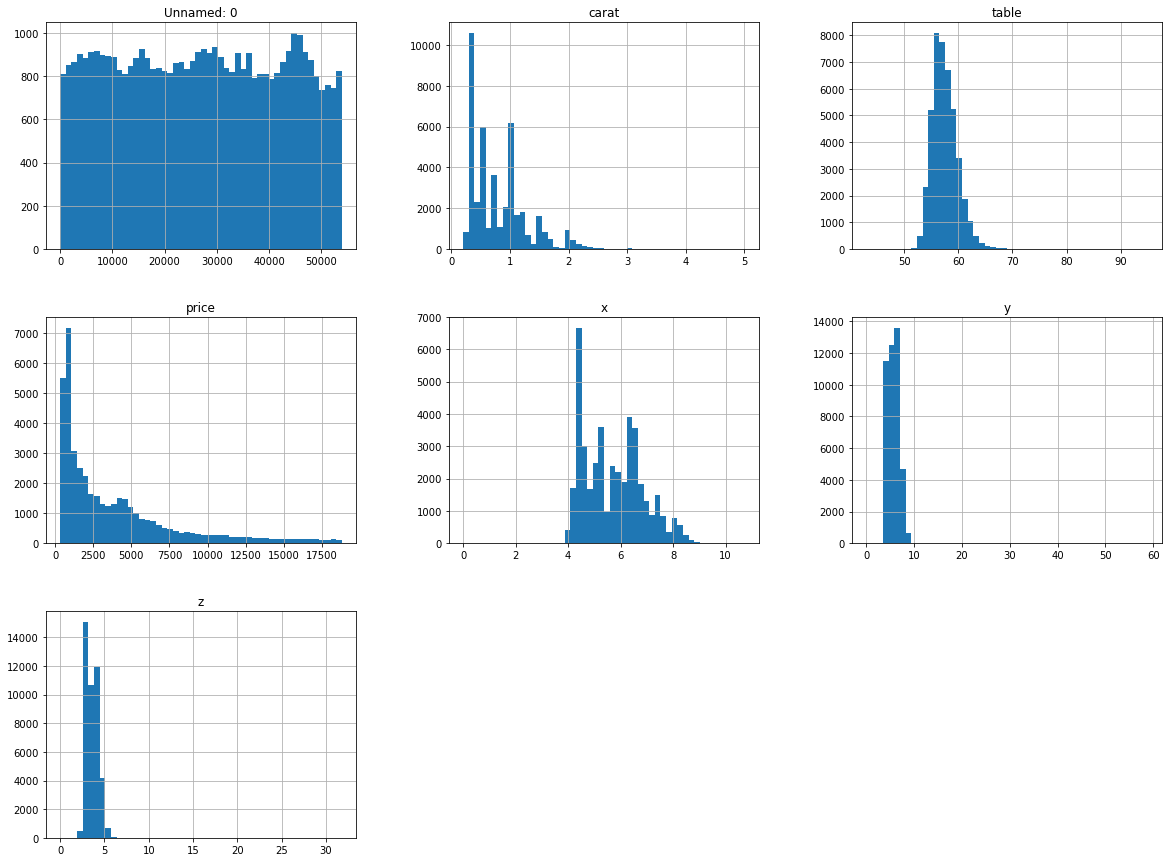

In [19]:
train_data.hist(bins=50, figsize=(20,15));

<AxesSubplot:xlabel='carat', ylabel='price'>

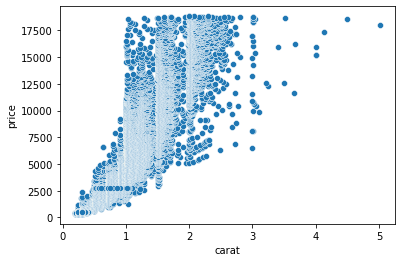

In [20]:
 sns.scatterplot(x=train_data["carat"], y = train_data["price"])

In [21]:
 train_data.drop(train_data[train_data["carat"]> 3].index, inplace=True)

<AxesSubplot:xlabel='carat', ylabel='price'>

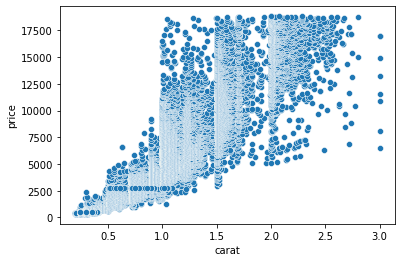

In [22]:
sns.scatterplot(x=train_data["carat"], y = train_data["price"])

<AxesSubplot:xlabel='x', ylabel='price'>

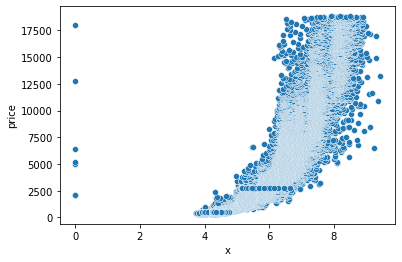

In [23]:
 sns.scatterplot(x=train_data["x"], y = train_data["price"])

In [24]:
train_data.drop(train_data[train_data["x"]< 2].index, inplace=True)

<AxesSubplot:xlabel='x', ylabel='price'>

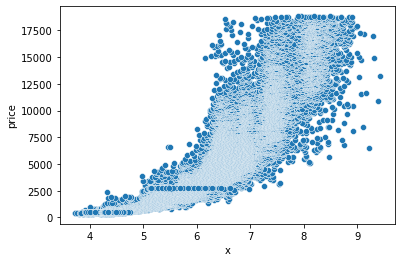

In [25]:
 sns.scatterplot(x=train_data["x"], y = train_data["price"])

<AxesSubplot:xlabel='y', ylabel='price'>

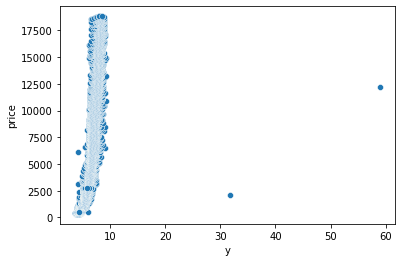

In [26]:
sns.scatterplot(x=train_data["y"], y = train_data["price"])

In [27]:
train_data.drop(train_data[train_data["y"]> 30].index, inplace=True)

<AxesSubplot:xlabel='y', ylabel='price'>

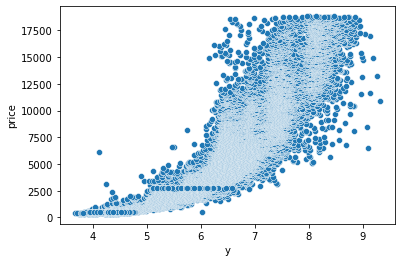

In [28]:
sns.scatterplot(x=train_data["y"], y = train_data["price"])

C:\Users\kings\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='z', ylabel='price'>

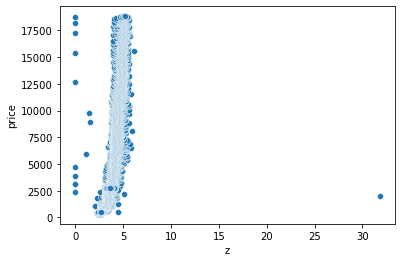

In [29]:
sns.scatterplot(train_data["z"], y = train_data["price"])

In [30]:
train_data.drop(train_data[train_data["z"]> 30].index, inplace=True)

C:\Users\kings\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='z', ylabel='price'>

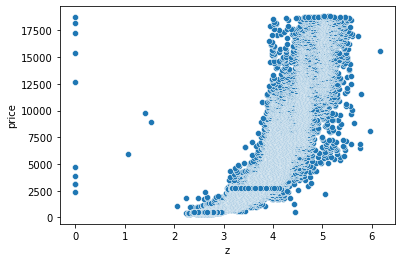

In [31]:
sns.scatterplot(train_data["z"], y = train_data["price"])

C:\Users\kings\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='z', ylabel='price'>

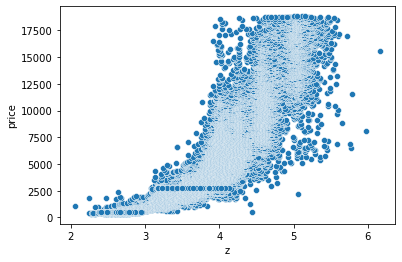

In [32]:
train_data.drop(train_data[train_data["z"]<2].index, inplace=True)
sns.scatterplot(train_data["z"], y = train_data["price"])

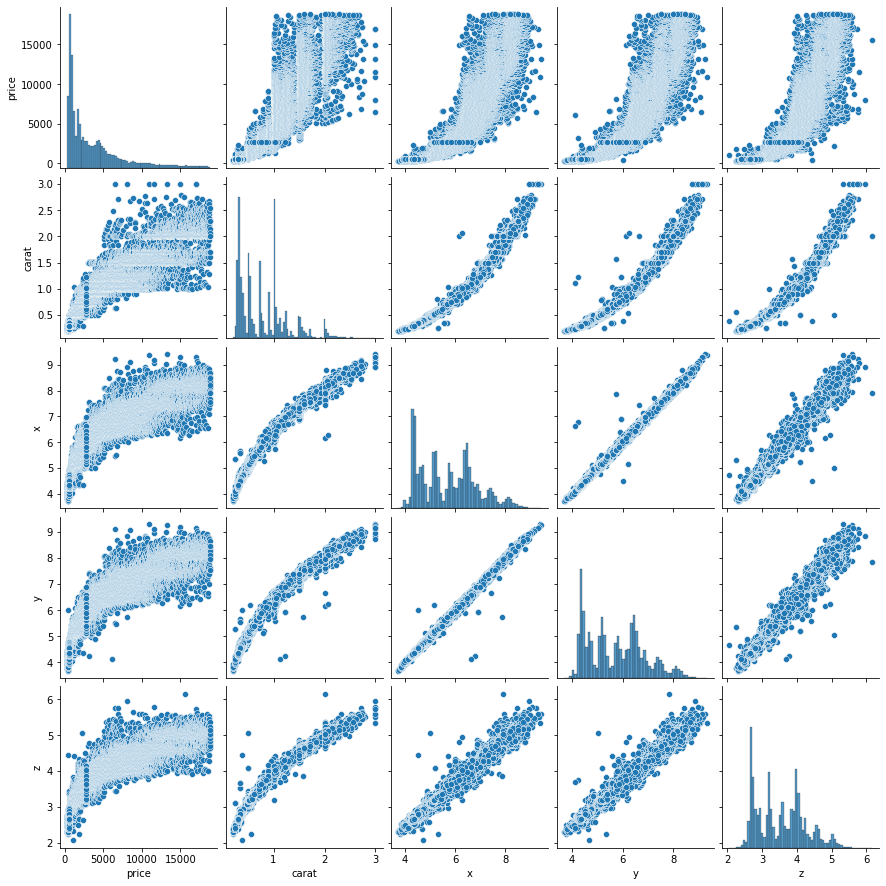

In [33]:
attributes=['price','carat','x','y','z']
sns.pairplot(train_data[attributes]);

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='carat', ylabel='price'>,
        <AxesSubplot:xlabel='x', ylabel='price'>,
        <AxesSubplot:xlabel='y', ylabel='price'>,
        <AxesSubplot:xlabel='z', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='carat'>,
        <AxesSubplot:xlabel='carat', ylabel='carat'>,
        <AxesSubplot:xlabel='x', ylabel='carat'>,
        <AxesSubplot:xlabel='y', ylabel='carat'>,
        <AxesSubplot:xlabel='z', ylabel='carat'>],
       [<AxesSubplot:xlabel='price', ylabel='x'>,
        <AxesSubplot:xlabel='carat', ylabel='x'>,
        <AxesSubplot:xlabel='x', ylabel='x'>,
        <AxesSubplot:xlabel='y', ylabel='x'>,
        <AxesSubplot:xlabel='z', ylabel='x'>],
       [<AxesSubplot:xlabel='price', ylabel='y'>,
        <AxesSubplot:xlabel='carat', ylabel='y'>,
        <AxesSubplot:xlabel='x', ylabel='y'>,
        <AxesSubplot:xlabel='y', ylabel='y'>,
        <AxesSubplot:xlabel='z', ylabel='y'>],
    

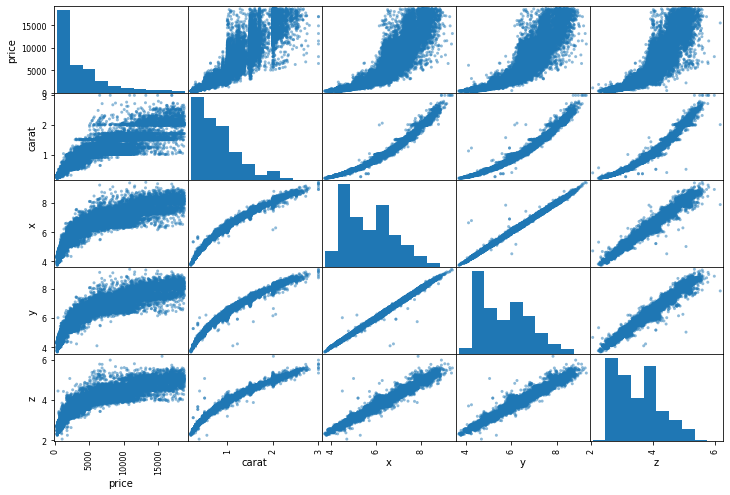

In [34]:
attributes = ["price", "carat", "x",'y','z']
scatter_matrix(train_data[attributes], figsize=(12, 8))

In [35]:
#Feature Engineering
train_data['volume']= train_data.x * train_data.y * train_data.z
train_data = train_data.drop(['x','y','z'], axis=1)

test_data['volume'] = test_data.x * test_data.y * test_data.z
test_data = test_data.drop(['x','y','z'], axis=1)

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='carat', ylabel='price'>,
        <AxesSubplot:xlabel='volume', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='carat'>,
        <AxesSubplot:xlabel='carat', ylabel='carat'>,
        <AxesSubplot:xlabel='volume', ylabel='carat'>],
       [<AxesSubplot:xlabel='price', ylabel='volume'>,
        <AxesSubplot:xlabel='carat', ylabel='volume'>,
        <AxesSubplot:xlabel='volume', ylabel='volume'>]], dtype=object)

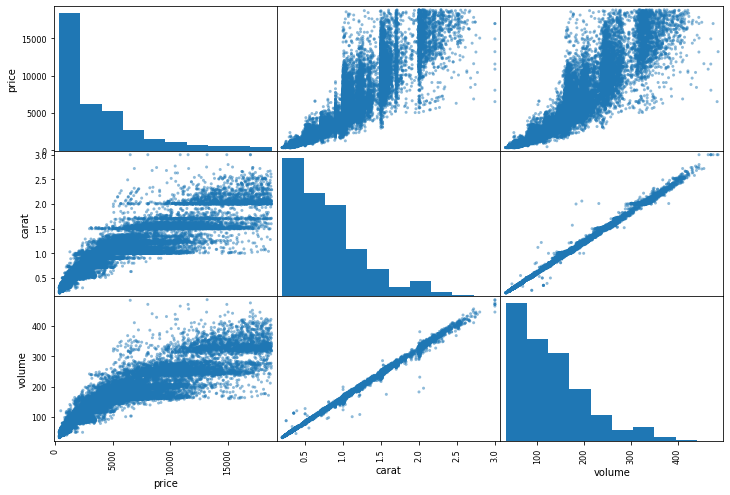

In [36]:
attributes = ["price", "carat", "volume"]
scatter_matrix(train_data[attributes], figsize=(12, 8))

In [37]:
train_data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
table         float64
price           int64
volume        float64
dtype: object

In [38]:
train_data['price'] = train_data.price.astype(float)
train_data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
table         float64
price         float64
volume        float64
dtype: object

In [39]:
x = train_data.drop(columns='price')
y = train_data['price']

# Ordinal Encoder converting categorical data into numeric from

In [40]:
print('cut : ',train_data['cut'].unique())
print('color : ',train_data['color'].unique())
print('clarity : ',train_data['clarity'].unique())

cut :  ['Premium' 'Good' 'Very Good' 'Fair' 'Ideal']
color :  ['E' 'I' 'J' 'F' 'H' 'D' 'G']
clarity :  ['SI1' 'VS2' 'SI2' 'VVS2' 'VVS1' 'I1' 'VS1' 'IF']


In [41]:
cat_attribs = ["cut" ,"color" , "clarity"]
num_attribs = ["Unnamed: 0","carat","table","volume"]

In [42]:
OE = ColumnTransformer([
        ("cat", OrdinalEncoder(categories = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], ['J','I','H','G','F','E','D'],
                                   ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2','VVS1', 'IF']]), cat_attribs),
        ("num", 'passthrough', num_attribs),
    ])

In [43]:
diamonds_prepared = OE.fit_transform(x)

In [44]:
x

,Unnamed: 0,carat,cut,color,clarity,table,volume
0,2,0.21,Premium,E,SI1,61.0,34.505856
1,4,0.29,Premium,I,VS2,58.0,46.724580
2,5,0.31,Good,J,SI2,58.0,51.917250
3,6,0.24,Very Good,J,VVS2,57.0,38.693952
4,7,0.24,Very Good,I,VVS1,57.0,38.830870
...,...,...,...,...,...,...,...
43035,53935,0.72,Premium,D,SI1,59.0,116.721246
43036,53936,0.72,Ideal,D,SI1,57.0,115.920000
43037,53937,0.72,Good,D,SI1,55.0,118.110175
43038,53939,0.86,Premium,H,SI2,58.0,140.766120


In [45]:
diamonds_prepared.tolist()

[[3.0, 5.0, 2.0, 2.0, 0.21, 61.0, 34.505856],
 [3.0, 1.0, 3.0, 4.0, 0.29, 58.0, 46.72458],
 [1.0, 0.0, 1.0, 5.0, 0.31, 58.0, 51.917249999999996],
 [2.0, 0.0, 5.0, 6.0, 0.24, 57.0, 38.693951999999996],
 [2.0, 1.0, 6.0, 7.0, 0.24, 57.0, 38.830870000000004],
 [0.0, 5.0, 3.0, 9.0, 0.22, 61.0, 36.425214000000004],
 [1.0, 0.0, 2.0, 11.0, 0.3, 55.0, 49.6587],
 [3.0, 4.0, 2.0, 13.0, 0.22, 61.0, 34.715136],
 [4.0, 0.0, 1.0, 14.0, 0.31, 54.0, 51.515744999999995],
 [3.0, 5.0, 1.0, 15.0, 0.2, 62.0, 32.262375],
 [3.0, 5.0, 0.0, 16.0, 0.32, 58.0, 51.883728000000005],
 [4.0, 1.0, 1.0, 17.0, 0.3, 54.0, 50.130472],
 [1.0, 0.0, 2.0, 18.0, 0.3, 54.0, 48.99609000000001],
 [1.0, 0.0, 2.0, 19.0, 0.3, 56.0, 48.833658],
 [2.0, 0.0, 2.0, 20.0, 0.3, 59.0, 47.818022],
 [1.0, 1.0, 1.0, 21.0, 0.3, 56.0, 49.64177999999999],
 [2.0, 0.0, 2.0, 24.0, 0.31, 62.0, 50.952974],
 [2.0, 0.0, 2.0, 25.0, 0.31, 62.0, 51.403212],
 [3.0, 1.0, 4.0, 27.0, 0.24, 57.0, 38.635246],
 [2.0, 0.0, 3.0, 28.0, 0.3, 57.0, 49.13868],
 [1.0, 2

# Training Data

In [46]:
#Train Split
X_train, X_rem, y_train, y_rem = train_test_split(diamonds_prepared,y,train_size=0.8,random_state=42)
#Validation & Testing
X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem,test_size=0.5,random_state=42)

In [47]:
print(X_train.shape, X_val.shape, X_test.shape)

(34388, 7) (4298, 7) (4299, 7)


In [48]:
def accuracies(model):
    
    # Train
    pred_train = model.predict(X_train)
    r2_train = r2_score(pred_train, y_train)*100
    mse_train = mean_squared_error(pred_train, y_train, squared = False)
    rmse_train = np.sqrt(mse_train)
    print("**** Training *****")
    print("R2: ", r2_train)
    print("RMSE: ", rmse_train)
    
    # Validation
    pred_validation = model.predict(X_val)
    r2_val = r2_score(pred_validation, y_val)*100
    mse_val = mean_squared_error(pred_validation, y_val, squared = False)
    rmse_val = np.sqrt(mse_val)
    print("\n**** Validataion ****")
    print("R2: ", r2_val)
    print("RMSE: ", rmse_val)
    
    
    # Testing
    pred_test = model.predict(X_test)
    r2_test = r2_score(pred_test, y_test)*100
    mse_test = mean_squared_error(pred_test, y_test, squared = False)
    rmse_test = np.sqrt(mse_test)
    print("\n**** Test ****")
    print("R2: ", r2_test)
    print("RMSE: ", rmse_test)


In [53]:
names = ["Linear Regression","Decision Tree Regressor","Random Forest Regressor",
         "K-Neighbors Regressor Algorithm","Lasso Regression","Ridge Regression"]
models = [LinearRegression(), DecisionTreeRegressor(),RandomForestRegressor(),
          KNeighborsRegressor(),Lasso(),Ridge()]

In [54]:
def fit_and_predict(name, model):
    variable_of_model = model
    variable_of_model.fit(X_train, y_train.ravel())
    accuracies(variable_of_model)

In [55]:
for name, model in zip(names, models):
    print("<<< ",name," >>>")
    fit_and_predict(name, model)
    print("\n\n------------------------------\n\n")

<<<  Linear Regression  >>>
**** Training *****
R2:  90.12166210336456
RMSE:  34.65788864878165

**** Validataion ****
R2:  90.66779541537142
RMSE:  34.27728139280377

**** Test ****
R2:  90.55095386631926
RMSE:  34.26079533537551


------------------------------


<<<  Decision Tree Regressor  >>>
**** Training *****
R2:  100.0
RMSE:  0.0

**** Validataion ****
R2:  99.9955971428545
RMSE:  5.17890065099755

**** Test ****
R2:  99.97834881985924
RMSE:  7.676270463831602


------------------------------


<<<  Random Forest Regressor  >>>
**** Training *****
R2:  99.99856045796733
RMSE:  3.8984904983240445

**** Validataion ****
R2:  99.99648236381816
RMSE:  4.895904425736997

**** Test ****
R2:  99.99637150116662
RMSE:  4.911165034141642


------------------------------


<<<  K-Neighbors Regressor Algorithm  >>>
**** Training *****
R2:  99.98571244492234
RMSE:  6.919696842363595

**** Validataion ****
R2:  99.98263794144626
RMSE:  7.297334420386263

**** Test ****
R2:  99.988641632991

C:\Users\kings\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24280212621.1182, tolerance: 55187856.97978677
  model = cd_fast.enet_coordinate_descent(


# Fine-Tuning the model


In [56]:
forest_reg = RandomForestRegressor()

param_grid = [
              {'n_estimators': [3,10,30], 'max_features':[2,4,6,8]},
              {'bootstrap':[False], 'max_features':[2,3,4],'n_estimators':[3,10]}
]

grid_search = GridSearchCV(forest_reg,param_grid,cv = 5, scoring = 'neg_mean_squared_error',return_train_score = True,refit=True)
grid_search.fit(X_train, y_train)
print("Best Params : ",grid_search.best_params_)
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

C:\Users\kings\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kings\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kings\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\kings\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\kings\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\kings\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\kings\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-54240.82769644 -27062.80946619 -22094.89918698  -6913.57264929
  -4359.99269508  -2694.6265951   -6156.87886784  -2774.93784705
  -1864.90354288             nan             nan             nan
 -41585.01479191 -19932.40351637 -11620.2510007   -6390.91555887
  -6834.38895707  -3380.66402414]
  warnings.warn(
C:\Users\kings\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the train scores are non-finite: [-1.80048277e+04 -7.29786788e+03 -4.02712957e+03 -3.23211683e+03
 -1.17627130e+03 -6.30068803e+02 -2.14455838e+03 -4.80312731e+02
 -3.88681762e+02             nan             nan             nan
 -1.59121004e-01 -2.51454478e-02 -9.66758182e-03 -2.33379064e-03
 -9.85471447e-05 -4.17293708e-05]
  warnings.warn(


Best Params :  {'max_features': 6, 'n_estimators': 30}
232.89660301609933 {'max_features': 2, 'n_estimators': 3}
164.5077793485343 {'max_features': 2, 'n_estimators': 10}
148.64353059243203 {'max_features': 2, 'n_estimators': 30}
83.14789624093108 {'max_features': 4, 'n_estimators': 3}
66.03024076193921 {'max_features': 4, 'n_estimators': 10}
51.909792863186325 {'max_features': 4, 'n_estimators': 30}
78.46578150916413 {'max_features': 6, 'n_estimators': 3}
52.67767883123217 {'max_features': 6, 'n_estimators': 10}
43.184528976026584 {'max_features': 6, 'n_estimators': 30}
nan {'max_features': 8, 'n_estimators': 3}
nan {'max_features': 8, 'n_estimators': 10}
nan {'max_features': 8, 'n_estimators': 30}
203.92404172119328 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
141.1821642997627 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
107.79726805770338 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
79.94320208043065 {'bootstrap': False, 'max_features': 3,

In [57]:
rf_model= RandomForestRegressor(max_features= 6, n_estimators = 30)

rf_model.fit(X_train, y_train)

y_pred= rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred,squared = False)
rmse = np.sqrt(mse)

results_df = pd.DataFrame(
    data=[["Random forest model tuned", r2_score(y_test, y_pred)*100, rmse]], 
    columns=['Model', 'R2', 'RMSE'])
results_df

,Model,R2,RMSE
0,Random forest model tuned,99.997227,4.592161


# Submission Test Data

In [58]:
diamonds_prepared_test = OE.fit_transform(test_data)
model = RandomForestRegressor(max_features= 6, n_estimators = 30)
model.fit(diamonds_prepared, y)
y_pred_final = model.predict(diamonds_prepared_test)

In [59]:
y_pred_final

array([ 362.66666667,  343.5       ,  352.83333333, ..., 2755.1       ,
       2755.43333333, 2755.43333333])

In [60]:
submission = test_data[['Unnamed: 0']]
submission['price'] = y_pred_final

C:\Users\kings\AppData\Local\Temp/ipykernel_20156/3697872784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['price'] = y_pred_final


In [61]:
submission

,Unnamed: 0,price
0,1,362.666667
1,3,343.500000
2,8,352.833333
3,10,375.733333
4,12,373.166667
...,...,...
10895,53922,2752.766667
10896,53923,2754.066667
10897,53933,2755.100000
10898,53934,2755.433333


In [62]:
submission.to_csv("sample_submission.csv",index=None)

In [63]:
pd.read_csv("sample_submission.csv")

,Unnamed: 0,price
0,1,362.666667
1,3,343.500000
2,8,352.833333
3,10,375.733333
4,12,373.166667
...,...,...
10895,53922,2752.766667
10896,53923,2754.066667
10897,53933,2755.100000
10898,53934,2755.433333
